In [ ]:
pip install -r 'dependences.txt'

In [2]:
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
import odc.geo.xr

In [4]:
# specify the file path of the netCDF file
file_path = 'geospatial_test_datacube.nc'
# open the netCDF file using xarray
ds = xr.open_dataset(file_path)
print(ds) # print metadata netCDF file
print(ds.variables) # access the variables of ds
print(ds.dims) # access the dimensions of ds

<xarray.Dataset>
Dimensions:   (time: 23, y: 227, x: 304)
Coordinates:
  * time      (time) datetime64[ns] 2021-04-09 2021-04-14 ... 2021-11-25
  * y         (y) float32 45.23 45.23 45.23 45.23 ... 45.21 45.21 45.21 45.21
  * x         (x) float32 -69.95 -69.95 -69.95 -69.95 ... -69.92 -69.92 -69.92
Data variables:
    S2_RED    (time, y, x) float32 ...
    S2_GREEN  (time, y, x) float32 ...
    S2_BLUE   (time, y, x) float32 ...
    S2_NIR    (time, y, x) float32 ...
Attributes:
    transform:        [ 8.98405270e-05  0.00000000e+00 -6.99499045e+01  0.000...
    crs:              +init=epsg:4326
    res:              [8.98405270e-05 9.04387077e-05]
    descriptions:     ['RED', 'GREEN', 'BLUE', 'NIR']
    AREA_OR_POINT:    Area
    _FillValue:       nan
    s2_data_lineage:  {"Data origin": "S3 bucket (ARN=arn:aws:s3:::sentinel-c...
    ulx, uly:         [-69.94990454  45.23320715]
Frozen({'time': <xarray.IndexVariable 'time' (time: 23)>
array(['2021-04-09T00:00:00.000000000', '2021-0

In [5]:
########## TASK 1A ########## 
# extract the variables for red and near-infrared bands
red = ds['S2_RED']
nir = ds['S2_NIR']

# NDVI for each date
ndvi = (nir - red) / (nir + red)
print(ndvi)
# add NDVI as a new data layer #same data cube
ds['ndvi'] = xr.DataArray(ndvi, dims=('time', 'y', 'x'))
print(ds['ndvi'])
# save modified data cube to new netCDF file
ds.to_netcdf('newds.nc') 

<xarray.DataArray (time: 23, y: 227, x: 304)>
array([[[0.62311345, 0.62311345, 0.6612276 , ..., 0.738523  ,
         0.7610312 , 0.7610312 ],
        [0.78484946, 0.78484946, 0.7461864 , ..., 0.729616  ,
         0.7360574 , 0.7360574 ],
        [0.7316661 , 0.7316661 , 0.6671105 , ..., 0.62512076,
         0.78181815, 0.78181815],
        ...,
        [0.6911272 , 0.48504552, 0.48504552, ..., 0.5377561 ,
         0.47117797, 0.5424836 ],
        [0.6953793 , 0.5753992 , 0.5753992 , ..., 0.37571156,
         0.5851346 , 0.7231702 ],
        [0.7114915 , 0.66701144, 0.66701144, ..., 0.5881436 ,
         0.77481365, 0.7161048 ]],

       [[0.44147158, 0.44147158, 0.54115593, ..., 0.7959596 ,
         0.78008753, 0.78008753],
        [0.7433155 , 0.7433155 , 0.75518537, ..., 0.77339894,
         0.782801  , 0.782801  ],
        [0.75450593, 0.75450593, 0.7139296 , ..., 0.74929094,
         0.7554786 , 0.7554786 ],
...
        [0.63016534, 0.551181  , 0.551181  , ..., 0.73238176,
         

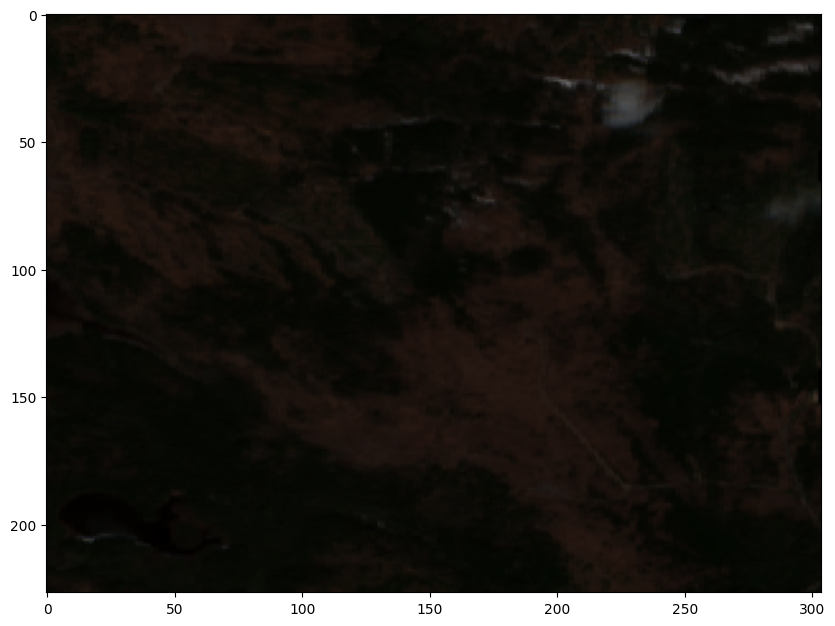

In [6]:
########## TASK 1B ########## 
# extract variables -RGB bands
red = ds['S2_RED'].sel(time='2021-04-09')
green = ds['S2_GREEN'].sel(time='2021-04-09')
blue = ds['S2_BLUE'].sel(time='2021-04-09')

# create and plot RGB image
rgb_image = np.dstack((red, green, blue))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(rgb_image)
plt.show()

<xarray.DataArray 'ndvi' (y: 227, x: 304)>
array([[0.62311345, 0.62311345, 0.6612276 , ..., 0.738523  , 0.7610312 ,
        0.7610312 ],
       [0.78484946, 0.78484946, 0.7461864 , ..., 0.729616  , 0.7360574 ,
        0.7360574 ],
       [0.7316661 , 0.7316661 , 0.6671105 , ..., 0.62512076, 0.78181815,
        0.78181815],
       ...,
       [0.6911272 , 0.48504552, 0.48504552, ..., 0.5377561 , 0.47117797,
        0.5424836 ],
       [0.6953793 , 0.5753992 , 0.5753992 , ..., 0.37571156, 0.5851346 ,
        0.7231702 ],
       [0.7114915 , 0.66701144, 0.66701144, ..., 0.5881436 , 0.77481365,
        0.7161048 ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2021-04-09
  * y        (y) float32 45.23 45.23 45.23 45.23 ... 45.21 45.21 45.21 45.21
  * x        (x) float32 -69.95 -69.95 -69.95 -69.95 ... -69.92 -69.92 -69.92


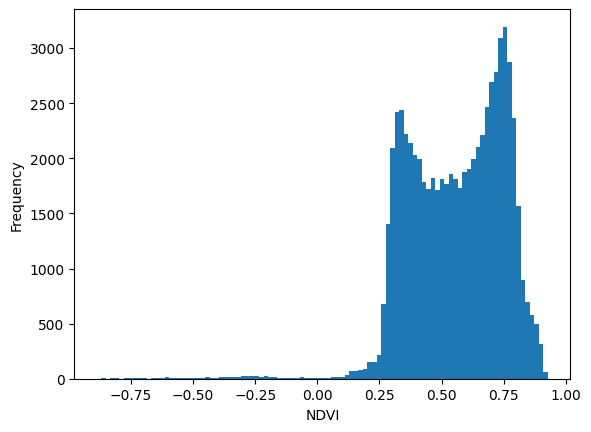

In [7]:
########## TASK 1C ########## 
# extract NDVI variable
ndvi1 = ds['ndvi'].sel(time='2021-04-09')
print(ndvi1)
# calculate and plot NDVI histogram
hist,bins= np.histogram(ndvi1.values.flatten(),bins=100,range=(-1,1))
fig, ax = plt.subplots()
ax.hist(ndvi1.values.flatten(), bins=100)
ax.set_xlabel('NDVI')
ax.set_ylabel('Frequency')
plt.show()

In [8]:
########## TASK 1D ##############
# Select the data within the AOI and calculate the average NDVI over time
ndvi_data = ds['ndvi']
avg_ndvi = ndvi_data.mean(dim=('y', 'x'))
# Convert time series data to a pandas dataframe
df = avg_ndvi.to_pandas()
print(df) #show the dataframe

time
2021-04-09    0.560181
2021-04-14    0.579453
2021-04-27    0.576881
2021-05-07    0.579228
2021-05-19    0.650879
2021-05-24    0.812332
2021-05-29    0.818721
2021-06-18    0.852717
2021-07-28    0.861783
2021-08-10    0.823053
2021-08-12    0.763636
2021-08-25    0.793151
2021-09-04    0.851028
2021-09-16    0.844687
2021-09-19    0.823391
2021-09-21    0.825111
2021-10-06    0.731453
2021-10-09    0.630867
2021-10-29    0.673654
2021-11-05    0.652978
2021-11-20    0.659958
2021-11-23    0.678537
2021-11-25    0.640067
dtype: float32


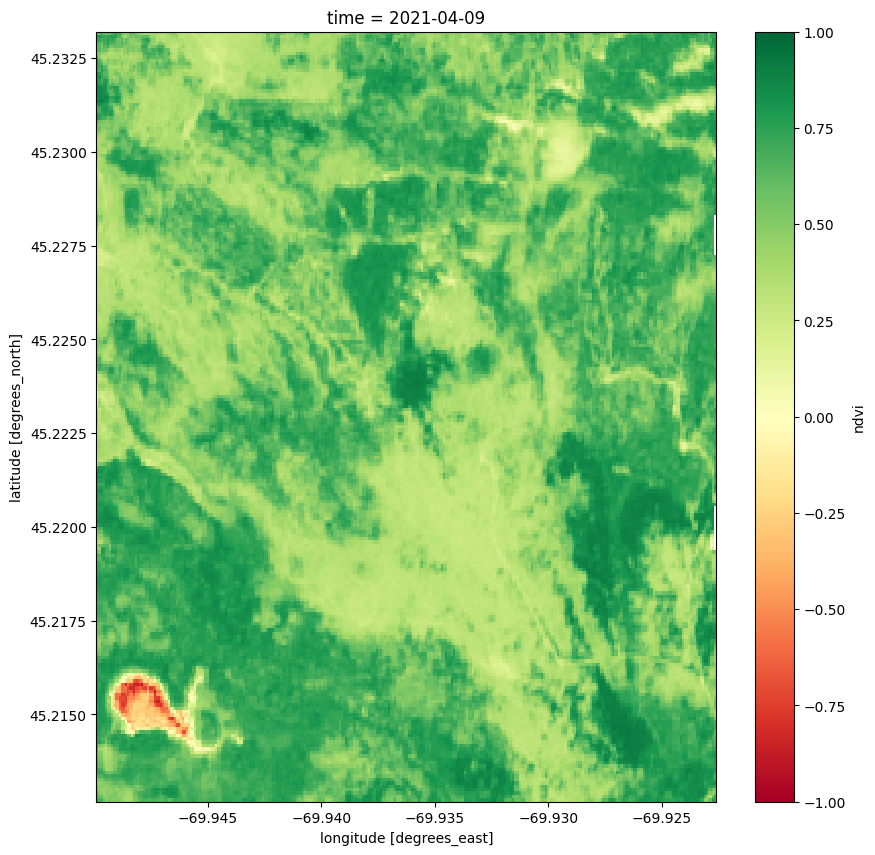

In [10]:
########## TASK 3 ################
# Set colormap
cmap = plt.get_cmap('RdYlGn')

# Visualize the NDVI 
fig, ax = plt.subplots(figsize=(10, 10))
ndvi1.plot(ax=ax, cmap=cmap, vmin=-1, vmax=1)
plt.show()

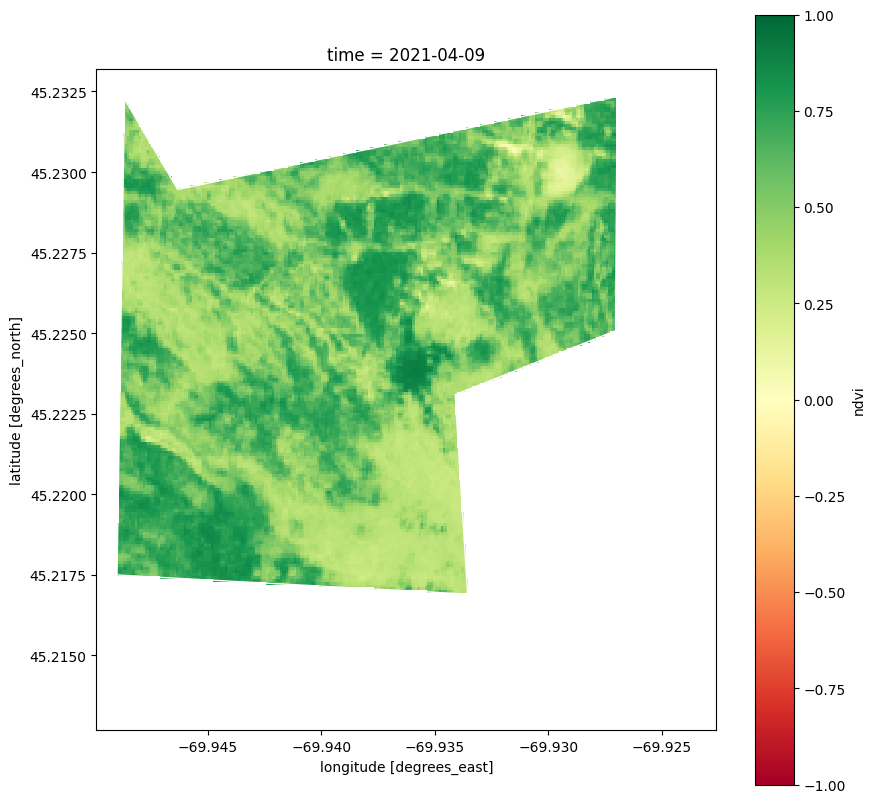

In [12]:
# Load the sub-AOI GeoJSON file
sub_aoi = gpd.read_file('geospatial_sub_aoi.geojson')

# Mask the data cube to sub-AOI 
mask = geometry_mask(sub_aoi.geometry, out_shape=ndvi1.shape,transform=ndvi1.odc.geobox.transform)

# Clip data cube
data_clipped = ndvi1.where(mask==False)

# Set up the colormap
cmap = plt.get_cmap('RdYlGn')
cmap.set_bad(color='white')

# plot NDVI clipped to the sub-AOI using the colormap
fig, ax = plt.subplots(figsize=(10, 10))
data_clipped.plot(ax=ax, cmap=cmap,vmin=-1, vmax=1)
sub_aoi.plot(ax=ax, facecolor='none', edgecolor='white')
plt.show()


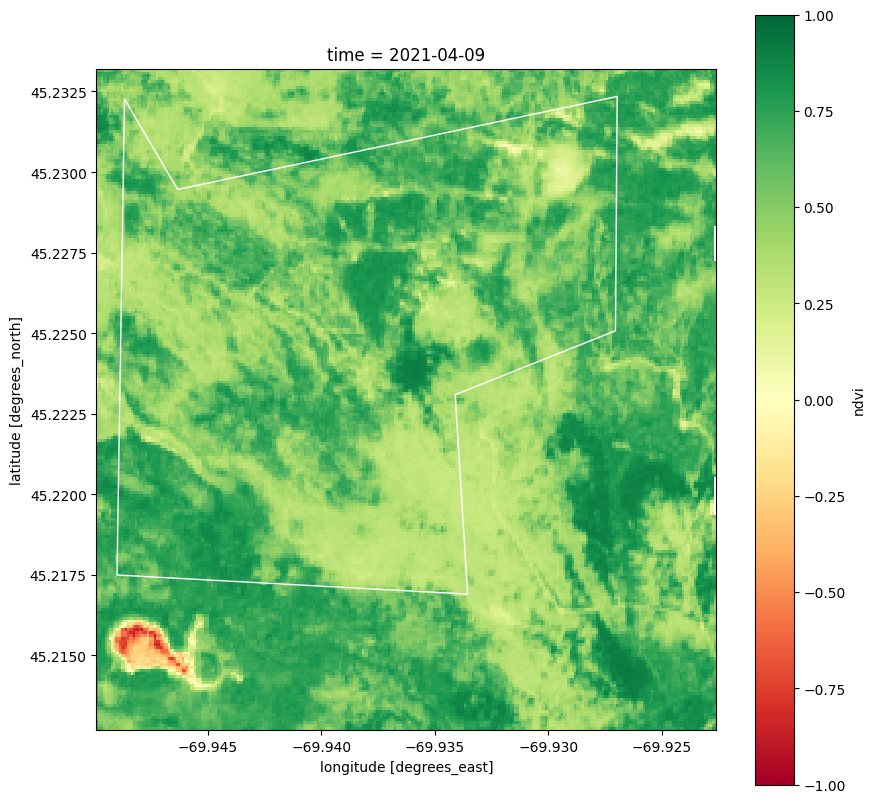

In [13]:
# plot NDVI clipped to the sub-AOI using the colormap
fig, ax = plt.subplots(figsize=(10, 10))
ndvi1.plot(ax=ax, cmap=cmap,vmin=-1, vmax=1)
sub_aoi.plot(ax=ax, facecolor='none', edgecolor='white')
plt.show()